In [1]:
from dens_est_clust import pdfCluster
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import make_blobs , make_moons
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

Method to predict given datapoints by a given modle and analyse the predictions against the groundtruth

In [2]:
def analysis(model, datapoints, labels):    
    prediction = model.fit_predict(datapoints)
    # reorder to match the predicted label with the real label
    cm = confusion_matrix(labels, prediction) 
    cm_argmax = cm.argmax(axis=0)
    prediction = np.array([cm_argmax[i] for i in prediction])
    # create evalutation metrics
    ari = adjusted_rand_score(labels, prediction)
    cf_matrix = confusion_matrix(labels, prediction) 
    print( "ARI Score: "+ str(ari))
    print(classification_report(labels, prediction, zero_division=0))
    sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap='Blues')

# Dataset 1: Blobs

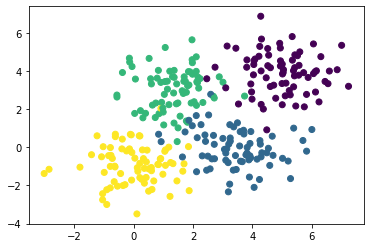

In [3]:
datapoints, labels = make_blobs(n_samples=300, centers=[(5,4),(3.5,0),(1,3),(0,-1)],random_state=44)
plt.scatter(datapoints[:,0],datapoints[:,1], c= labels)

In [4]:
kmeans = KMeans(n_clusters=4, random_state=0)
clust1 = AgglomerativeClustering(n_clusters=4, linkage="ward")
clust2 = AgglomerativeClustering(n_clusters=4, linkage="complete")
pdf = pdfCluster(n_clusters=4, bandwidth=0.3)

ARI Score: 0.8370358155057046
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        75
           1       0.97      0.87      0.92        75
           2       0.86      0.97      0.91        75
           3       0.95      0.97      0.96        75

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



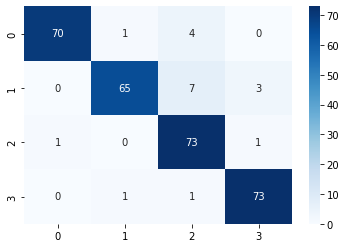

In [5]:
analysis(kmeans, datapoints, labels)

ARI Score: 0.6682134335435415
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        75
           1       0.98      0.77      0.87        75
           2       0.93      0.73      0.82        75
           3       0.68      1.00      0.81        75

    accuracy                           0.86       300
   macro avg       0.90      0.86      0.87       300
weighted avg       0.90      0.86      0.87       300



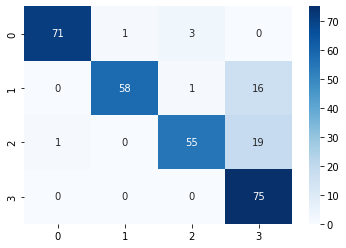

In [6]:
analysis(clust1, datapoints, labels)

ARI Score: 0.6624874135060039
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        75
           1       0.98      0.76      0.86        75
           2       0.90      0.73      0.81        75
           3       0.69      1.00      0.82        75

    accuracy                           0.86       300
   macro avg       0.89      0.86      0.86       300
weighted avg       0.89      0.86      0.86       300



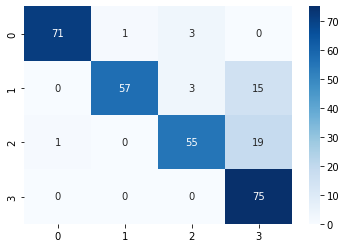

In [7]:
analysis(clust2, datapoints, labels)

ARI Score: 0.8191087659888817
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        75
           1       0.98      0.87      0.92        75
           2       0.82      0.99      0.90        75
           3       0.95      0.99      0.97        75

    accuracy                           0.93       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.94      0.93      0.93       300



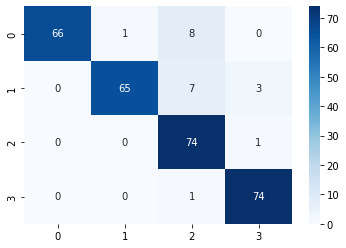

In [8]:
analysis(pdf, datapoints, labels)

# Dataset 2: Croissants

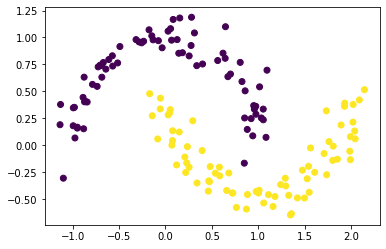

In [9]:
datapoints, labels = make_moons(n_samples = 150,noise=0.1, random_state=40)
plt.scatter(datapoints[:,0],datapoints[:,1], c= labels)

In [10]:
kmeans = KMeans(n_clusters=2, random_state=0)
clust1 = AgglomerativeClustering(n_clusters=2, linkage="ward")
clust2 = AgglomerativeClustering(n_clusters=2, linkage="complete")
pdf = pdfCluster(n_clusters=2,bandwidth=0.1)

ARI Score: 0.22520093068957275
              precision    recall  f1-score   support

           0       0.74      0.73      0.74        75
           1       0.74      0.75      0.74        75

    accuracy                           0.74       150
   macro avg       0.74      0.74      0.74       150
weighted avg       0.74      0.74      0.74       150



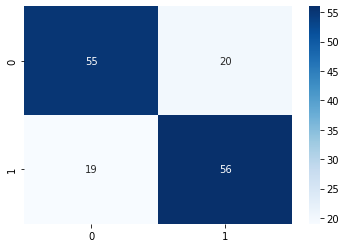

In [11]:
analysis(kmeans, datapoints, labels)

ARI Score: 0.5348781366310481
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        75
           1       1.00      0.73      0.85        75

    accuracy                           0.87       150
   macro avg       0.89      0.87      0.86       150
weighted avg       0.89      0.87      0.86       150



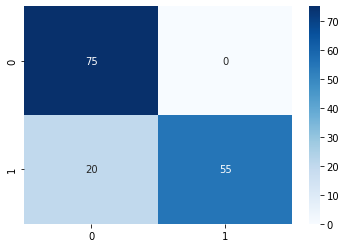

In [12]:
analysis(clust1, datapoints, labels)

ARI Score: 0.459141782982585
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        75
           1       0.76      1.00      0.86        75

    accuracy                           0.84       150
   macro avg       0.88      0.84      0.84       150
weighted avg       0.88      0.84      0.84       150



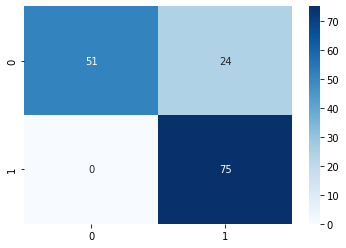

In [13]:
analysis(clust2, datapoints, labels)

ARI Score: 0.6376654958119428
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        75
           1       0.83      1.00      0.91        75

    accuracy                           0.90       150
   macro avg       0.92      0.90      0.90       150
weighted avg       0.92      0.90      0.90       150



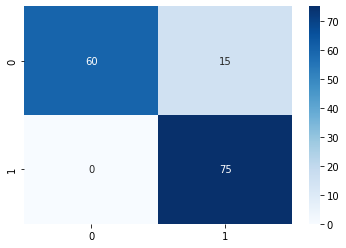

In [14]:
analysis(pdf, datapoints, labels)

# Dataset 3: Olives

In [15]:
olive_df = pd.read_csv('olive.csv')

Labels

In [16]:
labels = olive_df.filter(['region'], axis=1) - 1
labels = labels.to_numpy().ravel()

Datapoints and preprocessing

In [17]:
datapoints = olive_df.drop(['Unnamed: 0','region','area'], axis=1)
datapoints = datapoints + 1
datapoints = datapoints.div(datapoints.sum(axis=1), axis=0)

#Additive logratio transform 
denomiator = datapoints['eicosenoic']
datapoints = datapoints.drop(['eicosenoic'], axis=1)
datapoints = datapoints.div(denomiator, axis=0)
datapoints = np.log(datapoints)

# PCA
datapoints = PCA(n_components=5).fit_transform(datapoints)

In [18]:
kmeans = KMeans(n_clusters=3, random_state=0)
clust1 = AgglomerativeClustering(n_clusters=3, linkage="ward")
clust2 = AgglomerativeClustering(n_clusters=3, linkage="complete")
pdf = pdfCluster(n_clusters=3, bandwidth=0.4)

ARI Score: 0.8192208397689608
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       0.00      0.00      0.00        98
           2       0.61      1.00      0.76       151

    accuracy                           0.83       572
   macro avg       0.54      0.67      0.58       572
weighted avg       0.72      0.83      0.76       572



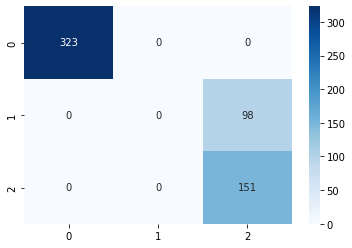

In [19]:
analysis(kmeans,datapoints, labels)

ARI Score: 0.8192208397689608
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       0.00      0.00      0.00        98
           2       0.61      1.00      0.76       151

    accuracy                           0.83       572
   macro avg       0.54      0.67      0.58       572
weighted avg       0.72      0.83      0.76       572



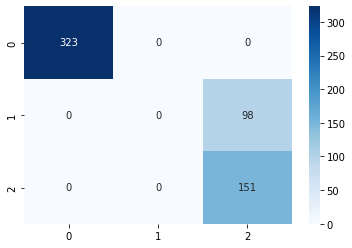

In [20]:
analysis(clust1,datapoints, labels)

ARI Score: 0.8192208397689608
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       0.00      0.00      0.00        98
           2       0.61      1.00      0.76       151

    accuracy                           0.83       572
   macro avg       0.54      0.67      0.58       572
weighted avg       0.72      0.83      0.76       572



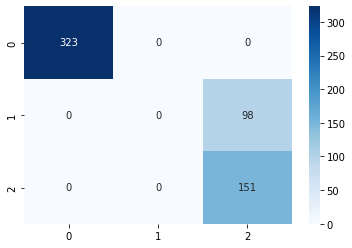

In [21]:
analysis(clust2, datapoints, labels) 

ARI Score: 0.8192208397689608
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       0.00      0.00      0.00        98
           2       0.61      1.00      0.76       151

    accuracy                           0.83       572
   macro avg       0.54      0.67      0.58       572
weighted avg       0.72      0.83      0.76       572



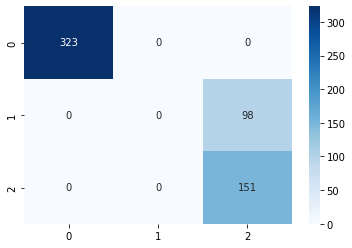

In [22]:
analysis(pdf, datapoints, labels)